<a href="https://colab.research.google.com/github/rakshithashri/Fraud-Detection-System/blob/main/Fraud_Transaction_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing necessary algorithms

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [8]:
# Load Dataset into a dataframeframe using pandas

df = pd.read_csv('/content/drive/MyDrive/Fraud Detection.zip')
print("Shape of the Dataset: ", df.shape) # number of rows and columns in our dataset
print("\n\n", df.columns) # columns/features in our Dataset
df.head() # first five records
df.tail() # last five records
# Print the shape of the dataframe

df = df.sample(frac = 0.3, random_state = 42) # using 30% of our dataset for next steps
print("Shape of the Dataset: ", df.shape)
# Determine number of fraud cases in Dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = (len(Fraud)/float(len(Valid)))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))
# The columns have been encrypted using PCA Dimensionality reduction to protect user identities and sensitive features

print("Description of the Dataset: ", df.describe())

Shape of the Dataset:  (284807, 31)


 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Shape of the Dataset:  (85442, 31)
Outlier_fraction: 0.15942606616181745 %
Fraud Cases: 136
Valid Transactions: 85306
Description of the Dataset:                  Time            V1            V2            V3            V4  \
count   85442.000000  85442.000000  85442.000000  85442.000000  85442.000000   
mean    94967.874862      0.003465      0.005440     -0.004776      0.002485   
std     47520.526676      1.953426      1.611981      1.520529      1.413738   
min         0.000000    -37.558067    -48.060856    -33.680984     -5.600607   
25%     54257.500000     -0.918861     -0.597627     -0.898758     -0.845937   
50%     84962.000000      0.027558      0.063774      0.172342     -0

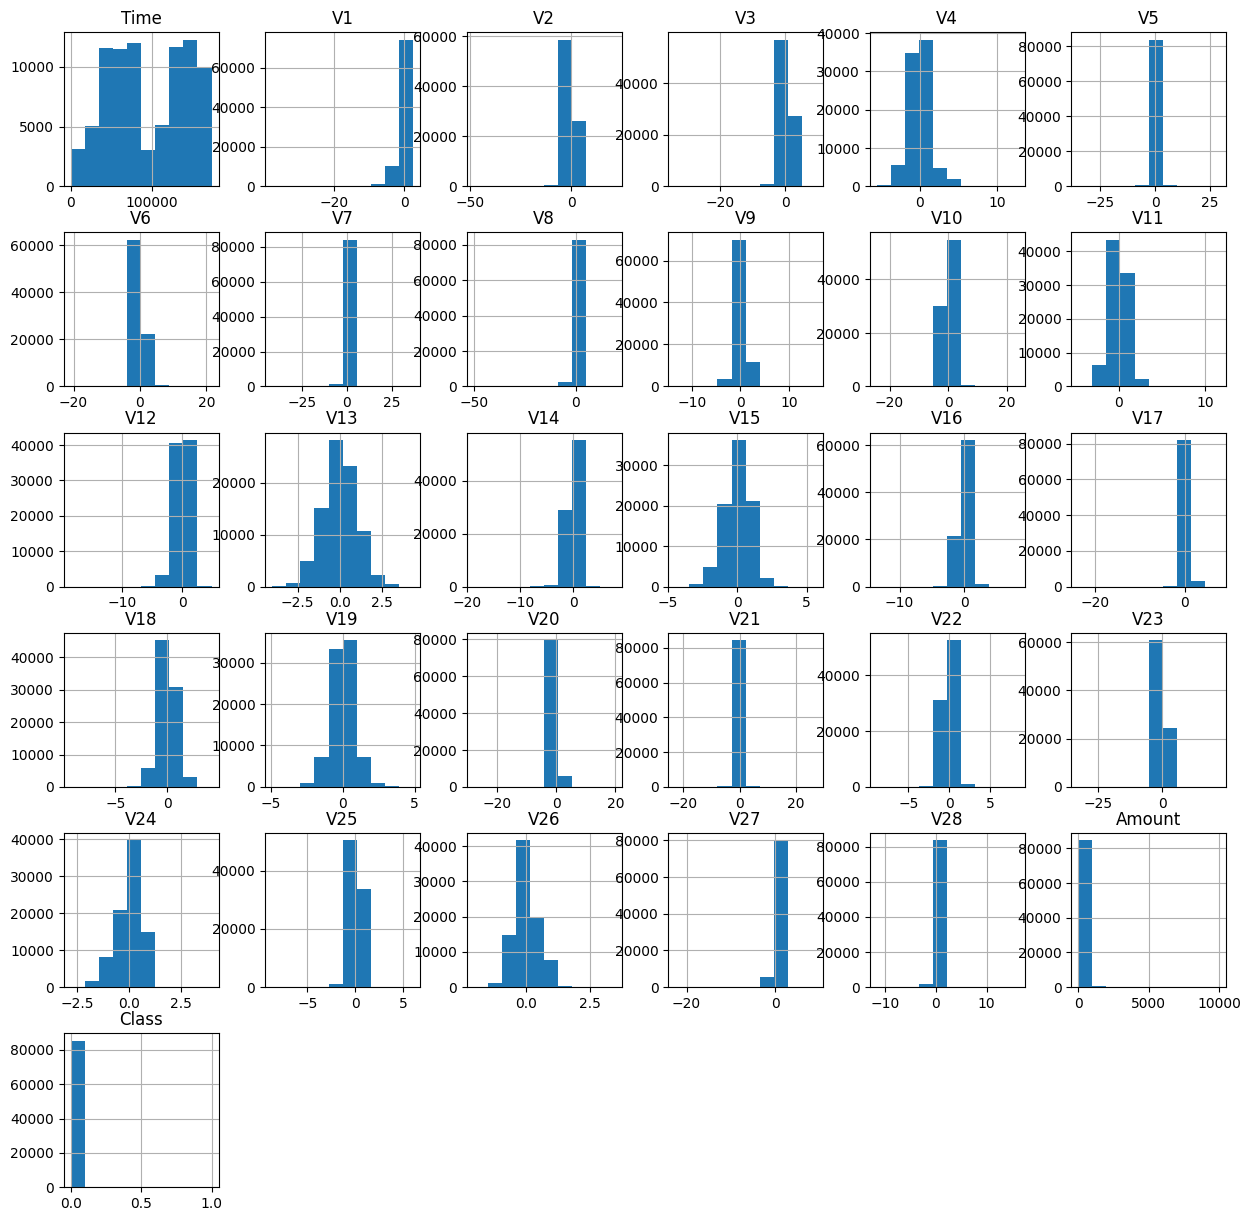

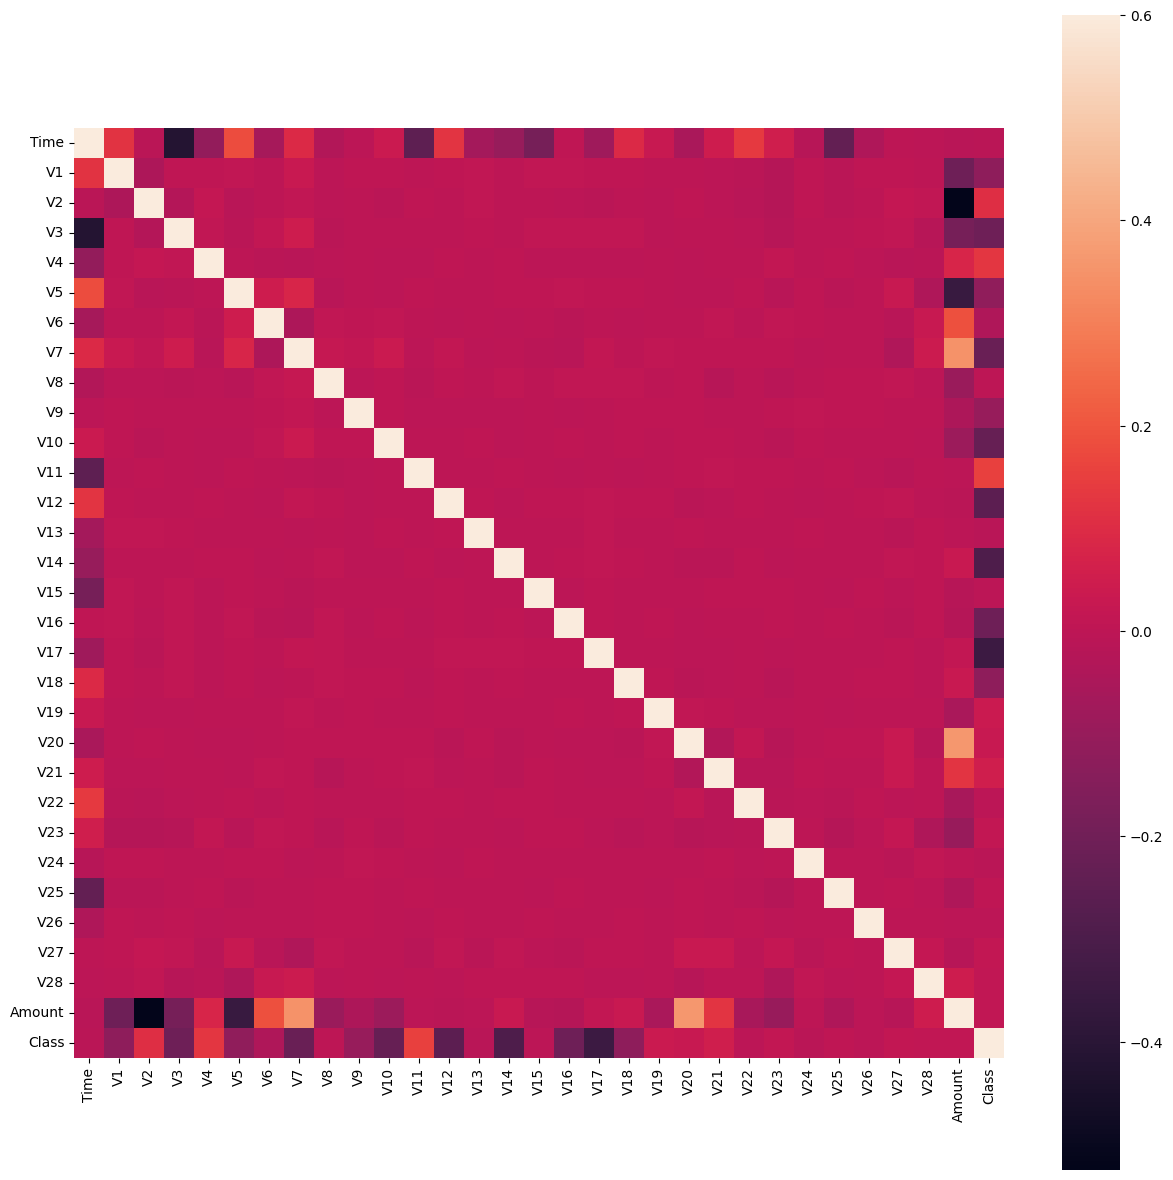

31

In [3]:
# Plot histograms for each parameter

df.hist(figsize = (15, 15))
plt.show()
# Correlation matrix

corrmat = df.corr()
fig = plt.figure(figsize = (15, 15))

#Plotting a heatmap to visualize the correlation matrix and see features
# with strong correlation to the target class
sns.heatmap(corrmat, vmax = .6, square = True) # vmax is the max and min value you want to have for the scale
plt.show()
corrmat['Class']
len(corrmat['Class'])

In [4]:
# getting columns which have correlation score > 0.01 or < -0.01, you can chose a different constant and experiment

cols = corrmat.keys()
cols_to_keep = []

for i in range(len(corrmat)):

    if abs(corrmat['Class'][i]) > 0.01:

        cols_to_keep.append(cols[i])
        len(cols_to_keep) # the final features list we wish to keep
        cols_to_keep
        # removing the 'Class' columnn from the features list, as it is the variable we wish to predict

cols = cols_to_keep[:-1]
features = df[cols] # records of all transactions, excluding the target class
target = df["Class"] # records of the corresponding label for each record

print(features.shape)
print(target.shape)

(85442, 21)
(85442,)


In [5]:
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "IF": IsolationForest(max_samples = len(features),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "LOF": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)}
        # skipping the train, test split step because we wish the model to overfit on these features and learn
# a mathematical function to map the features

n_outliers = len(Fraud)

# Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the dataframe and tag outliers
    if clf_name == "LOF":

        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_

    else:

        # train/fit classifier on our features
        clf.fit(features)
        # generate predictions
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)

    # Reshape the prediction values to 0 for valid, 1 for fraud.

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != target).sum()
    # Run classification metrics
    print('Classifier {0}: \nNumber of Errors: {1}'.format(clf_name, n_errors))
    print('Accuracy: {0}%\n'.format(accuracy_score(target, y_pred)*100))
    print(classification_report(target, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classifier IF: 
Number of Errors: 173
Accuracy: 99.797523466211%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.36      0.37      0.37       136

    accuracy                           1.00     85442
   macro avg       0.68      0.68      0.68     85442
weighted avg       1.00      1.00      1.00     85442

Classifier LOF: 
Number of Errors: 273
Accuracy: 99.68048500737342%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85442
   macro avg       0.50      0.50      0.50     85442
weighted avg       1.00      1.00      1.00     85442

